In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Read in the data and eliminate any rows with all zeros
df = pd.read_pickle("data.pkl")
df = df[(df.inside_eye > 0) & (df.outside_eye > 0) &(df.jaw > 0) & (df.temple > 0) & (df.vert_nose > 0)]
df.shape
df['type_enc'] = df['type'].astype('category').cat.codes

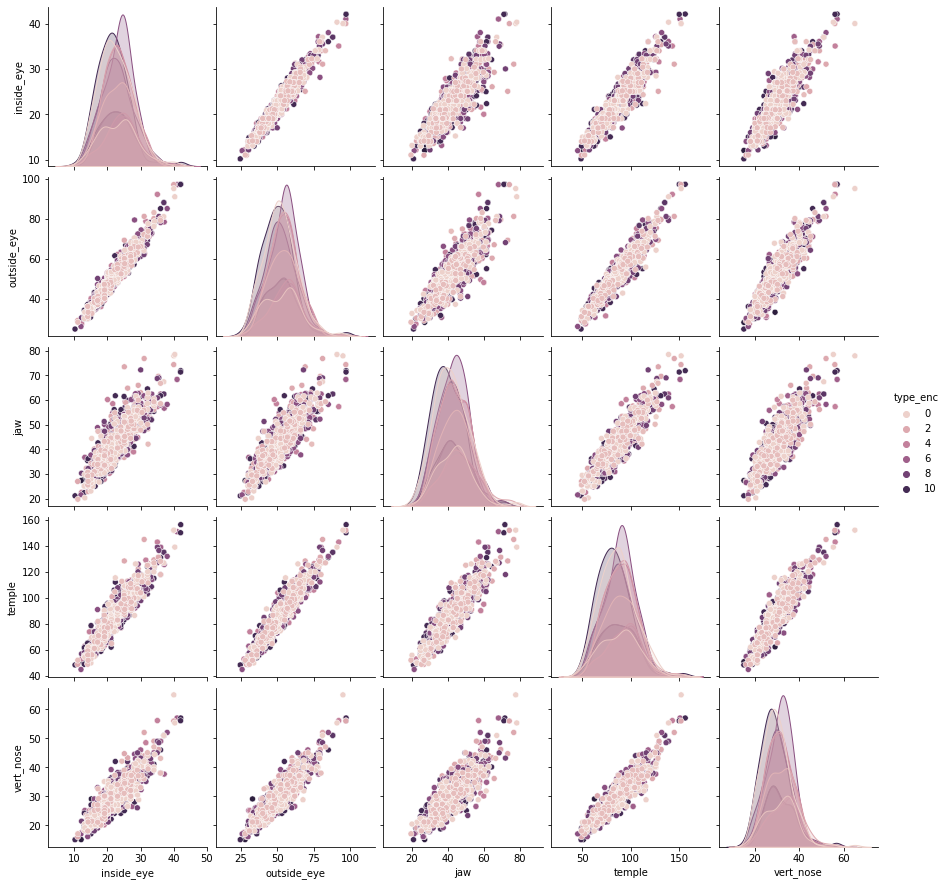

In [14]:
# Plotting and stuff
sns.pairplot(df, hue='type_enc')

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [17]:
# Convert X data to scalar
X = df[['inside_eye', 'outside_eye', 'jaw', 'temple', 'vert_nose']]
sc = StandardScaler()
X = sc.fit_transform(X)

# Convert categorical data
y = df['type']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
vector_y = np_utils.to_categorical(encoded_y)

In [25]:
# Split into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, vector_y, test_size=0.2, shuffle=True)

In [26]:
from keras import Sequential
from keras.layers import Dense

In [43]:
# define the model
def baseline_model():
    classifier = Sequential()
    #hidden
    classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=5))
    classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
    #output
    classifier.add(Dense(12, activation='softmax'))
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
    return classifier

In [48]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, validation_data=(X_test,y_test))
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [49]:
# Train
model = estimator.fit(X_train, y_train)

Epoch 1/100
243/243 [==============================] - 0s 2ms/step - loss: 2.4756 - accuracy: 0.1080 - val_loss: 2.4635 - val_accuracy: 0.1349
Epoch 2/100
243/243 [==============================] - 0s 1ms/step - loss: 2.4552 - accuracy: 0.1162 - val_loss: 2.4414 - val_accuracy: 0.1382
Epoch 3/100
243/243 [==============================] - 0s 1ms/step - loss: 2.4336 - accuracy: 0.1204 - val_loss: 2.4253 - val_accuracy: 0.1579
Epoch 4/100
243/243 [==============================] - 0s 1ms/step - loss: 2.4221 - accuracy: 0.1327 - val_loss: 2.4181 - val_accuracy: 0.1184
Epoch 5/100
243/243 [==============================] - 0s 950us/step - loss: 2.4140 - accuracy: 0.1352 - val_loss: 2.4141 - val_accuracy: 0.1184
Epoch 6/100
243/243 [==============================] - 0s 962us/step - loss: 2.4100 - accuracy: 0.1270 - val_loss: 2.4106 - val_accuracy: 0.1118
Epoch 7/100
243/243 [==============================] - 0s 988us/step - loss: 2.4053 - accuracy: 0.1336 - val_loss: 2.4097 - val_accuracy: 

Epoch 58/100
243/243 [==============================] - 0s 1ms/step - loss: 2.3684 - accuracy: 0.1583 - val_loss: 2.4023 - val_accuracy: 0.1546
Epoch 59/100
243/243 [==============================] - 0s 947us/step - loss: 2.3679 - accuracy: 0.1558 - val_loss: 2.3999 - val_accuracy: 0.1645
Epoch 60/100
243/243 [==============================] - 0s 1ms/step - loss: 2.3687 - accuracy: 0.1632 - val_loss: 2.3998 - val_accuracy: 0.1612
Epoch 61/100
243/243 [==============================] - 0s 1ms/step - loss: 2.3660 - accuracy: 0.1698 - val_loss: 2.4044 - val_accuracy: 0.1579
Epoch 62/100
243/243 [==============================] - 0s 1ms/step - loss: 2.3686 - accuracy: 0.1698 - val_loss: 2.3995 - val_accuracy: 0.1612
Epoch 63/100
243/243 [==============================] - 0s 1ms/step - loss: 2.3663 - accuracy: 0.1649 - val_loss: 2.3995 - val_accuracy: 0.1579
Epoch 64/100
243/243 [==============================] - 0s 983us/step - loss: 2.3649 - accuracy: 0.1690 - val_loss: 2.4006 - val_accur

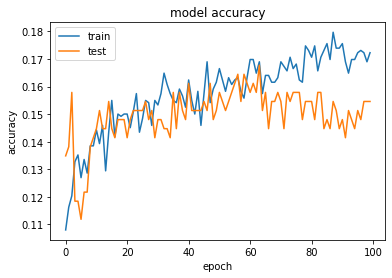

In [50]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

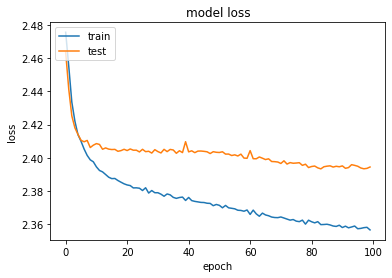

In [51]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Start predicting on test data
y_pred = estimator.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [36]:
acc = estimator.score(X_train, y_train)
acc

243/243 [==============================] - 0s 1ms/step - loss: 2.3406 - accuracy: 0.1863


0.1863149255514145

In [41]:
y_pred_vec = np.zeros_like(y_pred)
y_pred_vec[np.arange(len(y_pred)), y_pred.argmax(1)] = 1

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[10  0  7  1  0  0  0  5  1  0 16  0]
 [ 4  0  4  2  0  0  0  4  0  0  4  0]
 [ 6  0  9  1  0  0  0  4  0  0  6  0]
 [ 4  0  6  5  0  0  0  5  0  0  7  0]
 [ 5  0  4  3  0  0  0  8  1  0  6  0]
 [ 2  0  1  0  0  0  0  4  1  0  2  0]
 [ 3  0  3  4  0  0  0  4  2  0  1  0]
 [ 7  0  5  6  0  0  0 16  0  0  7  0]
 [14  0  6  1  0  0  0  4  0  0  9  0]
 [ 3  0  0  2  0  0  0  2  0  0  7  0]
 [ 9  0  4  3  0  0  0  4  3  0 11  0]
 [ 2  0  4  0  0  0  0  2  1  0  7  0]]


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_vec, normalize=True)

0.16776315789473684